# Statistical Analysis of Congruent and Incongruent Words

The objective of this study is to investigate a classic phenomenon known as the Stroop Effect. Participants were presented with a list of words, with each word displayed in a specific color. The participants were asked to say out loud the color of the ink in which the word was printed. 

There are two conditions in this study: a congruent words condition, and an incongruent words condition. If the words being displayed are color words whose names match the colors in which they are printed, (i.e. RED, BLUE), then this is congruent words condition. If the words displayed are color words whose names do not match the colors in which they are printed, (i.e. PURPLE, ORANGE), then this is an incongruent words condition. In each case, the time it takes to name the ink colors in equally-sized lists were recorded. 

The first step in our analysis is to import the data and calculate some descriptive statistics.

In [5]:
### Enabling the display of graphics: 

%matplotlib inline

In [6]:
congruent = [12.079,16.791,9.564,8.63,14.669,12.238,14.692,8.987,9.401,14.48,22.328,15.298,15.073,16.929,18.2,12.13,18.495,10.639,11.344,
            12.369,12.944, 14.233, 19.71, 16.004]

In [7]:
incongruent = [19.278, 18.741, 21.214, 15.687, 22.803, 20.878, 24.572, 17.394, 20.762, 26.282, 24.524, 18.644, 17.51, 20.33, 35.255, 22.158, 25.139, 20.429, 17.425, 34.288 ,23.894, 17.96, 22.058, 21.157]


In [8]:
### Enabling Statistical Functions
import numpy as np

In [9]:
mu_c = np.mean(congruent)

In [10]:
mu_i = np.mean(incongruent)

In [11]:
med_c = np.median(congruent)

In [12]:
med_i = np.median(incongruent)

In [13]:
std_c = np.std(congruent)

In [14]:
std_i = np.std(incongruent)

In [15]:
import matplotlib

In [16]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

To analyze this problem we will use a dependent t-test for paired samples. First we will complete the t-statistic based on the difference of the means. First we note that the means are different between the population mean and the sample mean. We want to determine if the difference is significant.
Then we will compare the t-statistic against the critical t-value for a specific alpha. Finally, if the t-statistic is outside the critical t-value, we will conclude that the null hypothesis can be rejected. We will use the dependent t-test for the following reasons:
1) The population mean was not provided. 
2) The same group (same sample) was used to measure the congruent timing as well as the incongruent timing.


Text(0.5,1,u'Histogram of Congruent Words')

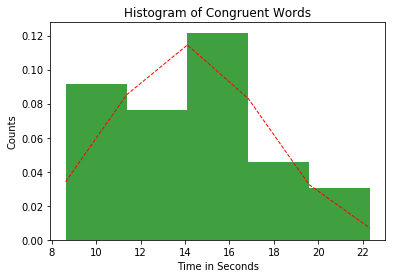

In [17]:
n, bins, patches = plt.hist(congruent, 5, normed=1, facecolor='green', alpha=0.75)
y = mlab.normpdf( bins, mu_c, std_c)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Time in Seconds')
plt.ylabel('Counts')
plt.title('Histogram of Congruent Words')





The plot above shows a relatively normal distribution.

Text(0.5,1,u'Histogram of Incongruent Words')

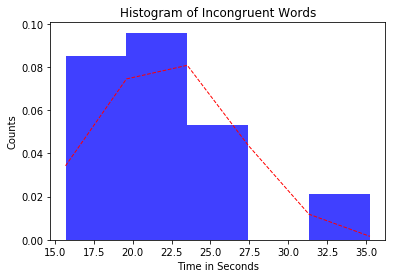

In [18]:
n, bins, patches = plt.hist(incongruent, 5, normed=1, facecolor='blue', alpha=0.75)
y = mlab.normpdf( bins, mu_i, std_i)
l = plt.plot(bins, y, 'r--', linewidth=1)
plt.xlabel('Time in Seconds')
plt.ylabel('Counts')
plt.title('Histogram of Incongruent Words')




The plot above is a distribution which is skewed to the right. 



Our independent variables are congruent and incontruent words. Our dependent variables are time in seconds for both cases. 


Our hypothesis is that the time required to read the incongruent words is greater than the time required to read the congruent words. 
So let H0 be the following: There is no difference in population means of response time under incongruent and congruent scenarios.

H0: μCongruent = μIncongruent

H1: μCongruent ≠ μIncongruent
 
In our analysis, there exists only two samples. We have no information about the population μ (mean) itself. 

The null hypothesis (H0) and alternative hypothesis (H1) of the dependent samples T-test can be performed without knowledge of the population itself. The T-test can statistically determine whether the H0 or H1 is true. 

Our goal is to draw a conclusion about the two data sets from a simple statistical test. One way to test our hypothesis is to use a statistic which would allow us to compare the central tendency (i.e. the mean or median) of each data set, (incongruent and congruent scenarios). Then we could calculate a confidence interval to see how likely it is that the two averages would be far apart in order to investigate the dependence of time upon color.


One option would be to compare the means and the medians. Another option would be to compare the mean against the median. All of these methods are measures of central tendency. However, given that the incongruent data is positively skewed, we want to choose a statistic which is less sensitive to the skew. The mean is the most sensitive. 
Below are some of the statistics:

Means:

In [19]:
np.round(mu_c,decimals=2)

14.050000000000001

In [20]:
np.round(mu_i,decimals=2)

22.02

Medians:

In [21]:
np.round(med_c,decimals=2)

14.359999999999999

In [22]:
np.round(med_i,decimals=2)

21.02

Standard Deviations: 

In [23]:
np.round(std_c,decimals=2)

3.48

In [24]:
np.round(std_i,decimals=2)

4.7000000000000002

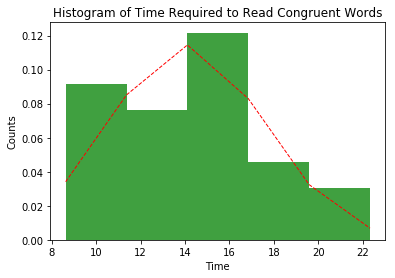

In [25]:
mu, sigma = mu_c, std_c

# the histogram of the data
n, bins, patches = plt.hist(congruent, 5, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Time')
plt.ylabel('Counts')
plt.title('Histogram of Time Required to Read Congruent Words')
#plt.grid(True)

plt.show()

These results display a histogram showing a relatively normal tendency. This is because our mean and the median are in close range,  —of approximately 14.

In [26]:
def bessel_corr_c(x, mean):
    bin = 0
    n = len(x)
    for x_i in x:
        bin = bin + (x_i-mean)**2
    S = np.sqrt(bin/(n-1))
    return S
bessel_corr_c(congruent, mu_c)

3.559357957645195

In [28]:
S_C = 3.559357957645195

3.559357957645195 is the Bessel corrected standard deviation for the congruent data. Because we don't know the actual population parameters, we are using the Bessel correction to estimate the standard deviation which is n-1 instead n, where n is the number of observations in a sample. The Bessel method corrects the possible bias that may exist in the estimation of the population variance. 



In [29]:
def bessel_corr_c(x, mean):
    bin = 0
    n = len(x)
    for x_i in x:
        bin = bin + (x_i-mean)**2
    S = np.sqrt(bin/(n-1))
    return S
bessel_corr_c(incongruent, mu_i)

4.7970571224691376

In [30]:
S_I = 4.7970571224691376

4.7970571224691376 is the Bessel corrected standard deviation for the incongruent data. This is an estimate of the standard deviation. 

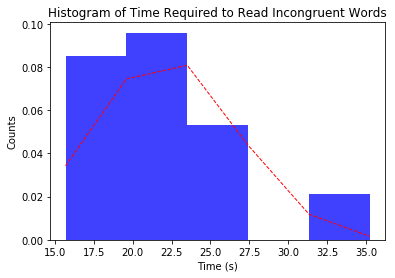

In [31]:
mu, sigma = mu_i, std_i

# the histogram of the data
n, bins, patches = plt.hist(incongruent, 5, normed=1, facecolor='blue', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Time (s)')
plt.ylabel('Counts')
plt.title('Histogram of Time Required to Read Incongruent Words')
#plt.grid(True)

plt.show()

These results show a histogram that is approximately normal. The red line shows a normal tendency. However, because our data shows some clustering towards the left, the distribution indicates a slight positive skew.

The statistical test we decided upon is the difference between the medians. Our null hypothesis is that there is no difference between the two medians. Our alternative hypothesis is that there is a difference between the two medians. 

In [32]:
def tStatCalc(x, y, muC, muI):
    tstat = np.mean(np.subtract(y,x)) / (np.std(np.subtract(x,y))/np.sqrt(len(x)-1))
    return tstat

In [33]:
tStatCalc(congruent,incongruent,mu_c,mu_i)

8.0207069441099588

Note that the t-statistic (8.0207069441099588) is fairly large. Now we need to compute the t-critical to compare with the t-statistic. No alpha level was provided in the problem. So we will arbitrarily choose an alpha level of 0.05, keeping in mind that the alpha level is the probability of rejecting the null hypothesis when the null hypothesis is true. Using the T-table, we find that the critical t-value is 2.069. Our t-statistic is outside the critical t-value. Thus, we can safely reject the null hypothesis.


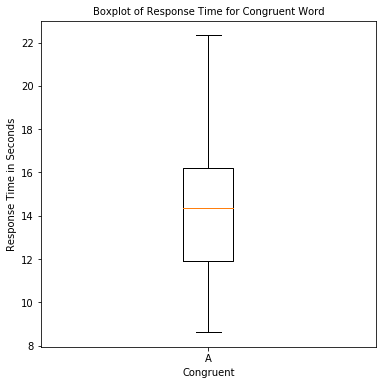

In [34]:
data = congruent 
labels = list('A')
fs = 10  

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
axes.boxplot(data, labels=labels)
axes.set_title('Boxplot of Response Time for Congruent Word', fontsize=fs)

axes.set_xlabel("Congruent")
axes.set_ylabel("Response Time in Seconds")


fig.subplots_adjust(hspace=0.4)
plt.show()

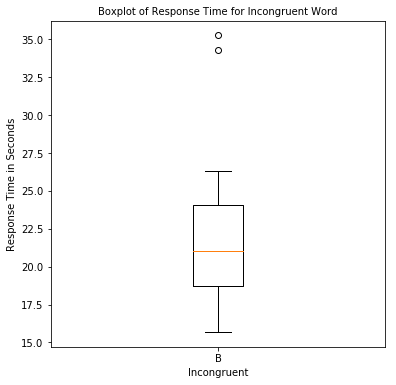

In [35]:
data = incongruent 
labels = list('B')
fs = 10  

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
axes.boxplot(data, labels=labels)
axes.set_title('Boxplot of Response Time for Incongruent Word', fontsize=fs)

axes.set_xlabel("Incongruent")
axes.set_ylabel("Response Time in Seconds")


fig.subplots_adjust(hspace=0.4)
plt.show()

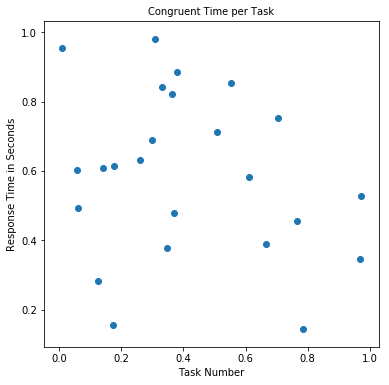

In [36]:
 N = len(congruent)

 x = np.random.rand(N)

 y = np.random.rand(N)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
axes.scatter (x,y)
axes.set_title('Congruent Time per Task', fontsize=fs)

axes.set_xlabel("Task Number")
axes.set_ylabel("Response Time in Seconds")


 plt.show()

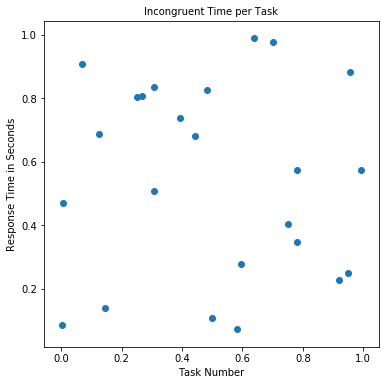

In [37]:
 N = len(incongruent)

 x = np.random.rand(N)

 y = np.random.rand(N)


fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6), sharey=True)
axes.scatter (x,y)
axes.set_title('Incongruent Time per Task', fontsize=fs)

axes.set_xlabel("Task Number")
axes.set_ylabel("Response Time in Seconds")


 plt.show()

The scatterplots above display the distributions of the data-sets.

There are some limitations to this analysis. To further support our hypothesis in rejecting the null hypothesis, I wanted to calculate the p-values. However, our data-set only provided a sample, and did not provide a larger population mean and other statistical values.


However, with the information that was available, the results obtained from this analysis matched up with my hypothesis that the null hypothesis can be rejected. 